In [1]:
!git clone https://github.com/anminhhung/small_dog_cat_dataset.git

Cloning into 'small_dog_cat_dataset'...
remote: Enumerating objects: 2608, done.
remote: Total 2608 (delta 0), reused 0 (delta 0), pack-reused 2608
Receiving objects: 100% (2608/2608), 55.84 MiB | 23.63 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
import os
import random
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Necessary Functions

In [3]:
def random_image_index(lenght_data: int) -> int:

    return np.random.randint(0, lenght_data-1)

In [4]:
def random_images(data_path: str) -> list:

    images_lst = []
    images_root = os.listdir(data_path)

    for i in range(16):
        index_image = random_image_index(len(images_root))
        image_path = os.path.join(data_path, images_root[index_image])
        images_lst.append(image_path)

    return images_lst

In [5]:
def show_images(data_path: str, label: str) -> None:
    images_lst = random_images(data_path)

    num_rows = 4
    num_cols = 4
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

    for i, image_path in enumerate(images_lst):
        image = cv.imread(image_path)
        axes[i // num_cols, i % num_cols].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB), interpolation='none')
        axes[i // num_cols, i % num_cols].set_title(f"{label} Image")
        axes[i // num_cols, i % num_cols].axis('off')
    plt.tight_layout()
    plt.show()

In [6]:
def image_flatten(image: np.array, image_size: int, augmentation: bool=False) -> np.array:
    image = cv.resize(image, (image_size, image_size))
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    equalized_image = cv.equalizeHist(image)

    if augmentation:
        # Apply data augmentation techniques here
        # For example, you can randomly flip the image horizontally
        if random.random() > 0.5:
            equalized_image = cv.flip(equalized_image, 1)

        # You can add more augmentation techniques like rotation, brightness changes, etc.

    features = hog(equalized_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
    return features

In [7]:
def X_y_data(data: list) -> list:

  X = []
  y = []

  for i in data:

    X.append(i[0])
    y.append(i[1])

  return X, y

In [8]:
def create_dataset(data_path: str, image_size: int) -> list:

  data_set = []

  for label in os.listdir(data_path):

    label_folder = os.path.join(data_path, label)

    for image_name in os.listdir(label_folder):

      image_path = os.path.join(label_folder, image_name)
      image = cv.imread(image_path)

      if image is not None:
        image = image_flatten(image, image_size)
        if label == "dogs":
          data_set.append((image, 1))
        else:
          data_set.append((image, 0))
      else:
        print(f"Can't open image {image_path}")

      random.shuffle(data_set)
      X, y =  X_y_data(data_set)
      X = np.array(X)
      y = np.array(y)

  return X, y

# Visualization Dataset

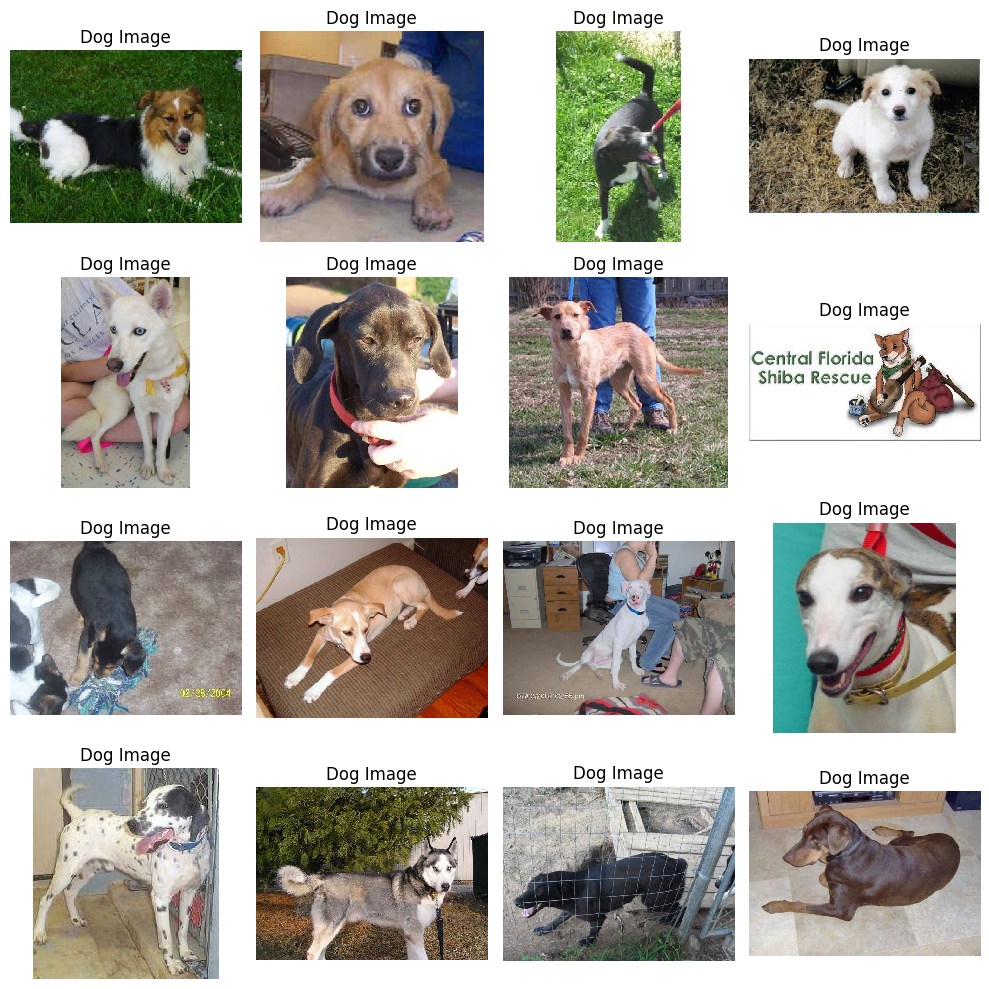

In [9]:
show_images('/content/small_dog_cat_dataset/train/dogs', "Dog")

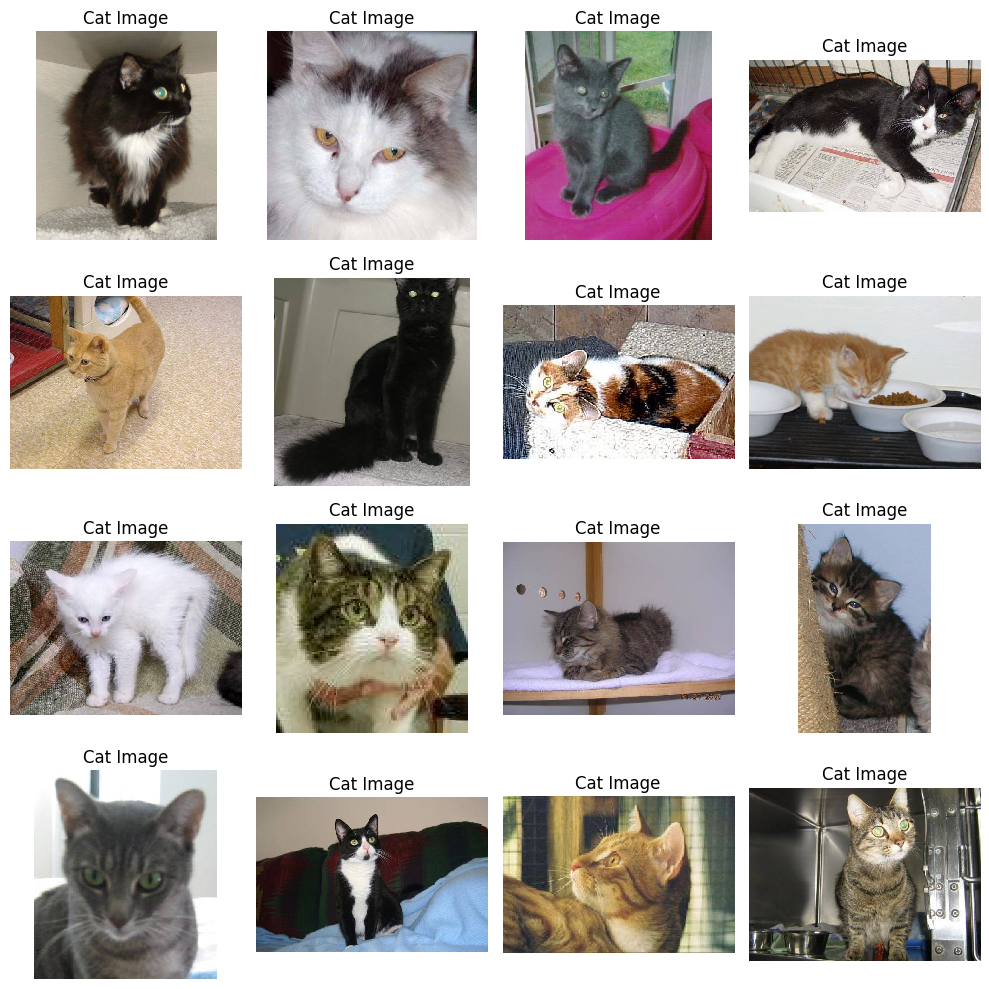

In [10]:
show_images('/content/small_dog_cat_dataset/train/cats', "Cat")

# Create Dataset

In [11]:
X_train, y_train =create_dataset('/content/small_dog_cat_dataset/train', 128)

In [12]:
X_train.shape

(2000, 8100)

In [13]:
y_train.shape

(2000,)

In [14]:
X_test, y_test =create_dataset('/content/small_dog_cat_dataset/test', 128)

In [15]:
X_test.shape

(600, 8100)

In [16]:
y_test.shape

(600,)

# Training Model

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Evaluation Model

In [18]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [19]:
print(f"Accuray {accuracy}")

Accuray 0.69
